# Notebook de Procesamiento de Audio

El notebook siguiente es para probar las librerias respecto al procesamiento de datos.

In [6]:
# Se importan las librerias necesarias.
from IPython.display import Audio
import numpy as np
import librosa
from IPython.display import Audio
import pyaudio
import wave
import matplotlib.pyplot as plt

Se reproduce un sonido por medio de un URL de github, en este caso es el sonido de agua.

In [7]:
Audio(url="https://github.com/Ariana1998/NotebookProcesamientoAudio/raw/main/Agua.wav")

En este caso se reproduce un fragmento del instrumental de una canci&oacute;n de mi preferencia.

In [8]:
Audio('https://github.com/Ariana1998/NotebookProcesamientoAudio/raw/main/lovesick_girls.mp3')

Por medio de la librer&iacute;a numpy se experimenta con la creaci&oacute;n de un nuevo sonido que dura 4 segundos.

In [9]:
framerate = 44000
t = np.linspace(0,9,framerate*4)
data = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)
Audio(data,rate=framerate)

En esta secci&oacute;n se utiliza la librer&iacute;a Librosa, la cual tiene piezas musicales de muestra, en este caso escogi Brahms la danza h&uacute;ngara #5.
Adem&aacute;s la herramienta nos permite saber los tempos estimados de la pieza musical, y tambien los beats por minuto.

In [10]:
filename = librosa.example('brahms')

y, sr = librosa.load(filename)

tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

beat_times = librosa.frames_to_time(beat_frames, sr=sr)

Estimated tempo: 152.00 beats per minute


En esta secci&oacute;n podemos ver graficada de la pieza musical.

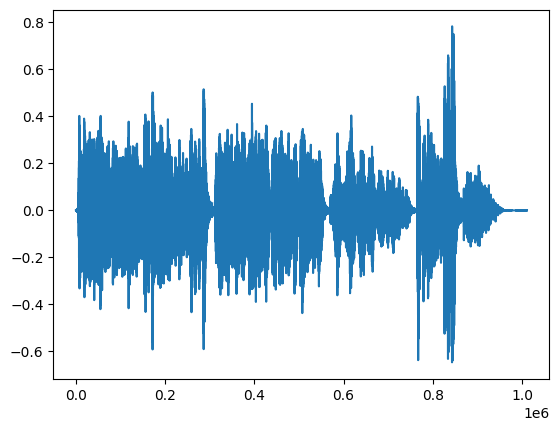

In [22]:
filename = librosa.example('brahms')
y, sr = librosa.load(filename)
import matplotlib.pyplot as plt
plt.plot(y)

En esta secci&oacute;n se reproduce la pieza musical.

In [14]:
Audio(data=y, rate=sr)

Se puede observar por medio de la herramienta  tanto el tempo como los beat frames de la pieza musical.

In [15]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print(tempo)
print(beat_frames)

151.99908088235293
[  13   30   47   63   81   97  112  128  144  161  179  196  213  230
  248  266  283  300  318  336  354  369  386  403  420  437  454  470
  487  504  522  540  559  576  593  610  629  647  665  681  698  713
  728  743  758  774  790  807  824  841  858  874  890  906  923  940
  957  975  993 1012 1029 1046 1064 1081 1098 1116 1133 1150 1168 1184
 1201 1218 1235 1252 1268 1284 1301 1318 1333 1349 1365 1381 1397 1413
 1429 1445 1462 1480 1498 1514 1529 1546 1563 1579 1596 1612 1629 1646
 1665 1685 1701 1717]


Se observa los beat time de la pieza musical.

In [16]:
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
print(beat_times)

[ 0.30185941  0.69659864  1.09133787  1.46285714  1.88081633  2.2523356
  2.60063492  2.9721542   3.34367347  3.7384127   4.15637188  4.55111111
  4.94585034  5.34058957  5.75854875  6.17650794  6.57124717  6.96598639
  7.38394558  7.80190476  8.21986395  8.56816327  8.96290249  9.35764172
  9.75238095 10.14712018 10.54185941 10.91337868 11.30811791 11.70285714
 12.12081633 12.53877551 12.97995465 13.37469388 13.76943311 14.16417234
 14.60535147 15.02331066 15.44126984 15.81278912 16.20752834 16.55582766
 16.90412698 17.2524263  17.60072562 17.9722449  18.34376417 18.7385034
 19.13324263 19.52798186 19.92272109 20.29424036 20.66575964 21.03727891
 21.43201814 21.82675737 22.2214966  22.63945578 23.05741497 23.4985941
 23.89333333 24.28807256 24.70603175 25.10077098 25.4955102  25.91346939
 26.30820862 26.70294785 27.12090703 27.4924263  27.88716553 28.28190476
 28.67664399 29.07138322 29.44290249 29.81442177 30.209161   30.60390023
 30.95219955 31.32371882 31.6952381  32.06675737 32.43

Con toda esta secci&oacute;n podemos ver la pieza musical por medio de filtros.

In [17]:
y, sr = librosa.load(librosa.ex('brahms'),
                     offset=30, duration=10)
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
chroma_med = librosa.decompose.nn_filter(chroma,
                                         aggregate=np.median,
                                         metric='cosine')

In [18]:
rec = librosa.segment.recurrence_matrix(chroma, mode='affinity',
                                        metric='cosine', sparse=True)
chroma_nlm = librosa.decompose.nn_filter(chroma, rec=rec,
                                         aggregate=np.average)

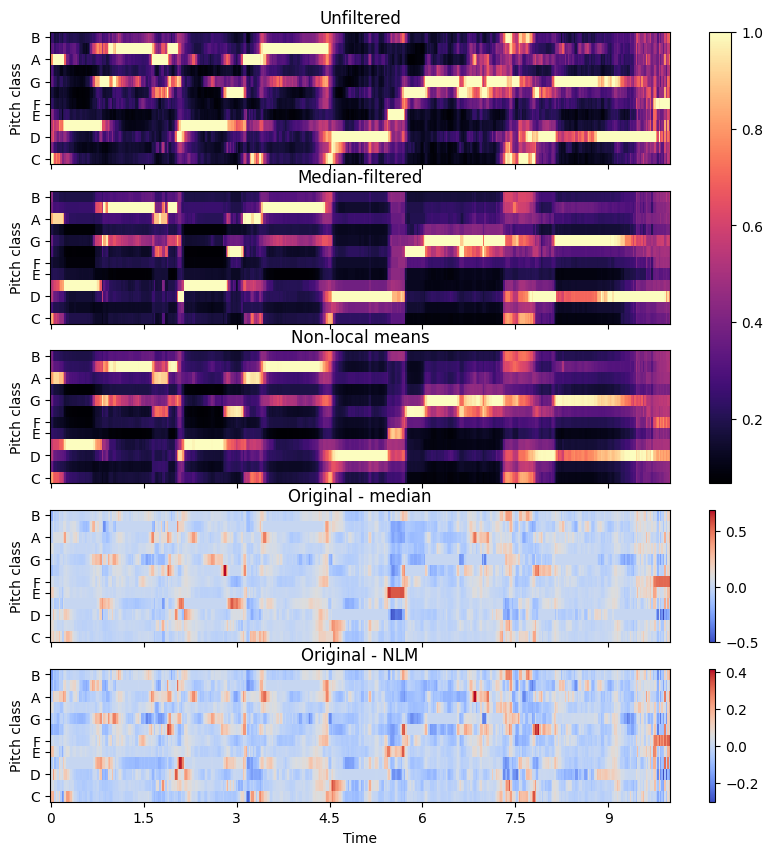

In [19]:
fig, ax = plt.subplots(nrows=5, sharex=True, sharey=True, figsize=(10, 10))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='Unfiltered')
ax[0].label_outer()
librosa.display.specshow(chroma_med, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='Median-filtered')
ax[1].label_outer()
imgc = librosa.display.specshow(chroma_nlm, y_axis='chroma', x_axis='time', ax=ax[2])
ax[2].set(title='Non-local means')
ax[2].label_outer()
imgr1 = librosa.display.specshow(chroma - chroma_med,
                         y_axis='chroma', x_axis='time', ax=ax[3])
ax[3].set(title='Original - median')
ax[3].label_outer()
imgr2 = librosa.display.specshow(chroma - chroma_nlm,
                         y_axis='chroma', x_axis='time', ax=ax[4])
ax[4].label_outer()
ax[4].set(title='Original - NLM')
fig.colorbar(imgc, ax=ax[:3])
fig.colorbar(imgr1, ax=[ax[3]])
fig.colorbar(imgr2, ax=[ax[4]])

Con la librer&iacute;a Pyaudio podemos grabar por la cantidad de 5 segundos el audio y guardarlo en un archivo .wav

In [24]:
# RECORDING

chunk = 1024  # Record in chunks of 1024 samples
sample_format = pyaudio.paInt16  # 16 bits per sample
channels = 1
fs = 44100  # Record at 44100 samples per second
seconds = 5
filename = "prueba.wav"

p = pyaudio.PyAudio()  # Create an interface to PortAudio

print('Grabando')

stream = p.open(format=sample_format,
                channels=channels,
                rate=fs,
                frames_per_buffer=chunk,
                input=True)

frames = []  # Initialize array to store frames

# Store data in chunks for 3 seconds
for i in range(0, int(fs / chunk * seconds)):
    data = stream.read(chunk)
    frames.append(data)

# Stop and close the stream 
stream.stop_stream()
stream.close()
# Terminate the PortAudio interface
p.terminate()

print('Grabacion terminada')

# Save the recorded data as a WAV file
wf = wave.open(filename, 'wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(fs)
wf.writeframes(b''.join(frames))
wf.close()

Grabando
Grabacion terminada


Y por &uacute;ltimo se puede reproducir la grabaci&oacute;n previamente hecha.

In [25]:
# PLAYING

filename = 'prueba.wav'

# Set chunk size of 1024 samples per data frame
chunk = 1024  

# Open the sound file 
wf = wave.open(filename, 'rb')

# Create an interface to PortAudio
p = pyaudio.PyAudio()

# Open a .Stream object to write the WAV file to
# 'output = True' indicates that the sound will be played rather than recorded
stream = p.open(format = p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = wf.getframerate(),
                output = True)

# Read data in chunks
data = wf.readframes(chunk)

# Play the sound by writing the audio data to the stream
while len(data)>0:
    stream.write(data)
    data = wf.readframes(chunk)
    
# Close and terminate the stream
stream.close()
p.terminate()